In [3]:
a=[26974,26914,16675,10918,11716,9714,6910,5010,4682,4130]

In [4]:
xpoints=list(range(1,11))

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

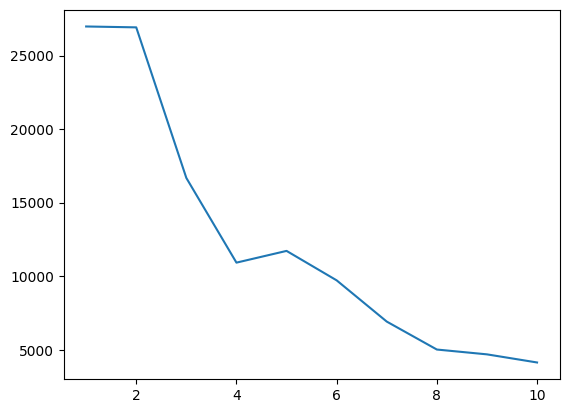

In [7]:
plt.plot(xpoints, a)

In [3]:
# Pandas is a fantastic and powerful tool for working with structured data
# it's the best of spreadsheets + python, and it has quickly become a go to
# library for data scientists in python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Your path may vary, change this appropriately
path_to_ny_sales = '/Users/liletian/Downloads/nyc-rolling-sales.csv'

# One of the things we love about pandas is that it's easy to load CSV data
# into a "data frame"
sales_df = pd.read_csv(path_to_ny_sales)

# And, it makes it easy to take a look at the first n items:
sales_df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
# And a summary with bundles of useful information on the numerical fields
sales_df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [5]:
sales_df = sales_df.drop(columns=[
    'Unnamed: 0',
    'ADDRESS',          # Hard to parse. Block/zip/borough/neighborhood capture all the value we need. 
    'APARTMENT NUMBER', # Likely irrelevent to the price. Ought to be categorical, which would make data large.
    'SALE DATE',        # Everything was within a 12 month period, likely irrelevant and hard to parse.
    'LOT'               # A lot is a unique identifier within a block, and categorical. Not worth it. 
])

# Look again with dropped columns
sales_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,5,0,5,1633,6440,1900,2,C2,6625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,28,3,31,4616,18690,1900,2,C7,-
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,16,1,17,2212,7803,1900,2,C7,-
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,10,0,10,2272,6794,1913,2,C4,3936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,6,0,6,2369,4615,1900,2,C2,8000000


In [6]:
# Sometimes we get some unexpected datatypes when loading data
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    print(col, dtype)

BOROUGH int64
NEIGHBORHOOD object
BUILDING CLASS CATEGORY object
TAX CLASS AT PRESENT object
BLOCK int64
EASE-MENT object
BUILDING CLASS AT PRESENT object
ZIP CODE int64
RESIDENTIAL UNITS int64
COMMERCIAL UNITS int64
TOTAL UNITS int64
LAND SQUARE FEET object
GROSS SQUARE FEET object
YEAR BUILT int64
TAX CLASS AT TIME OF SALE int64
BUILDING CLASS AT TIME OF SALE object
SALE PRICE object


In [7]:
# Some of our data that appears numeric really shouldn't be... instead lets treat them as categorical columns.
categorical_columns = [
    'BOROUGH',
    'BLOCK',
    'ZIP CODE',
    'TAX CLASS AT TIME OF SALE'
]

for c in categorical_columns:
    sales_df[c] = sales_df[c].astype('category')

In [8]:
# Lets look at the sale price and see if we can understand why it's not a numeric type...
sales_df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [9]:
# Looks like the data is a string type, and sometimes has a value of -
# The documentation suggests the - value means that there was no sale
# just a property transfer for nothing, such as an inheritance. 
# Lets try to coerce the data to numeric where possible:
coerced_sales = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')

# Values that cannot be coerced are changed to Not a Number (NaN). 
# We can use this code to examine those values:
only_non_numerics = sales_df['SALE PRICE'][coerced_sales.isna()]

# And this to print all the unique values from only_non_numerics
only_non_numerics.unique()

array([' -  '], dtype=object)

In [10]:
# So, indeed, the only value that wasn't a number as a string was the ' - ' value. 
# good to know. Lets go ahead and coerce them all to zero
sales_df['SALE PRICE'] = pd.to_numeric(sales_df['SALE PRICE'], errors='coerce')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].fillna(0)

In [11]:
sales_df.describe()


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,2.025264,0.193559,2.249184,1789.322976,1.056623e+06
std,16.721037,8.713183,18.972584,537.344993,1.038794e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,1.000000,1920.000000,0.000000e+00
50%,1.000000,0.000000,1.000000,1940.000000,4.150000e+05
75%,2.000000,0.000000,2.000000,1965.000000,8.300000e+05
max,1844.000000,2261.000000,2261.000000,2017.000000,2.210000e+09


In [12]:
# Two other columns should be numeric, but are objects. Lets look at them too to prove they have missing values:
convert_to_numeric = [
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET'
]

for col in convert_to_numeric:
    coerced = pd.to_numeric(sales_df[col], errors='coerce')
    only_non_numerics = sales_df[col][coerced.isna()]

    # And this to print all the unique values from only_non_numerics
    print(col, only_non_numerics.unique())

LAND SQUARE FEET [' -  ']
GROSS SQUARE FEET [' -  ']


In [13]:
# convert first, then drop rows where the value could not be converted to a number
sales_df['LAND SQUARE FEET'] = pd.to_numeric(sales_df[col], errors='coerce')
sales_df = sales_df.dropna(subset=['LAND SQUARE FEET'])

# Note that land square feet now appears in the descriptive stats...
sales_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE
count,56936.000000,56936.000000,56936.000000,5.693600e+04,56936.000000,5.693600e+04
mean,2.772657,0.270286,3.058873,4.045707e+03,1845.492009,9.792441e+05
std,20.034100,10.317925,22.674204,3.503249e+04,430.019359,1.234621e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.046750e+03,1920.000000,0.000000e+00
50%,1.000000,0.000000,1.000000,1.680000e+03,1931.000000,3.878605e+05
75%,2.000000,0.000000,2.000000,2.560000e+03,1960.000000,7.494002e+05
max,1844.000000,2261.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [15]:
# So... similarly there are missing values. But, unlike the sale data, we don't have 
# any clues about what this means, and it's hard to imagine that a building exists with
# but occupies zero square feet... We'll apply another common tactic called "imputation"
# We're just going to use the mean value when there is missing data, it's better than nothing
# even though it may be wrong.
from sklearn.impute import SimpleImputer

col = 'GROSS SQUARE FEET'

coerced = pd.to_numeric(sales_df[col], errors='coerce')
sales_df[col] = coerced
sales_df[col] = sales_df[col].astype('float')
    
# Then, we can use the Imputer to fill in any missing values
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 

# Only fit it on our relevant column, then transform creates the data for the column with imputed values
# the imputer generally works with 2D data, so we have to comply a bit which is why we have the additional
# square brackets around sales_df[col]
imputer.fit([sales_df[col]]) 
imputed_values = imputer.transform([sales_df[col]])

# Now replace our old Series with the new imputed values. 
# This syntax is more or less coercing a row vector to a column vector.
sales_df['GROSS SQUARE FEET'] = imputed_values[0] # Again, imputed values are 2D...

sales_df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,56936.000000,56936.000000,56936.000000,5.693600e+04,5.693600e+04,56936.000000,5.693600e+04
mean,2.772657,0.270286,3.058873,4.045707e+03,4.045707e+03,1845.492009,9.792441e+05
std,20.034100,10.317925,22.674204,3.503249e+04,3.503249e+04,430.019359,1.234621e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.046750e+03,1.046750e+03,1920.000000,0.000000e+00
50%,1.000000,0.000000,1.000000,1.680000e+03,1.680000e+03,1931.000000,3.878605e+05
75%,2.000000,0.000000,2.000000,2.560000e+03,2.560000e+03,1960.000000,7.494002e+05
max,1844.000000,2261.000000,2261.000000,3.750565e+06,3.750565e+06,2017.000000,2.210000e+09


In [17]:
# A correlation matrix example:
correlation_matrix = sales_df.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical');
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns);
plt.show()

ValueError: could not convert string to float: 'ALPHABET CITY'

In [18]:
# Not surprising that total units seems to correlate most with price. 
# Interesting that residential units seems more correlated than commercial

# What haven't we looked at...
sales_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [19]:
# Hmm, we haven't see anything to do with ease-ment yet. Lets get a sample of what kind of values are in there.
sales_df['EASE-MENT'].unique()

array([' '], dtype=object)

RESIDENTIAL UNITS


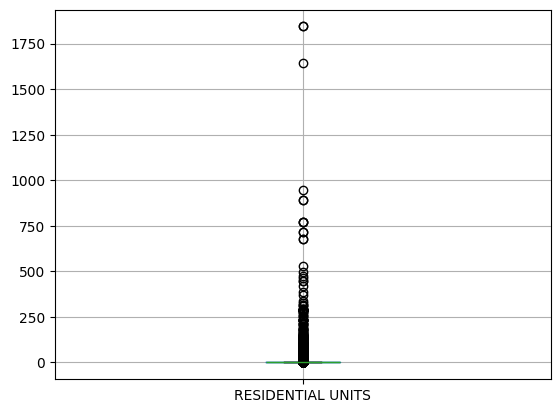

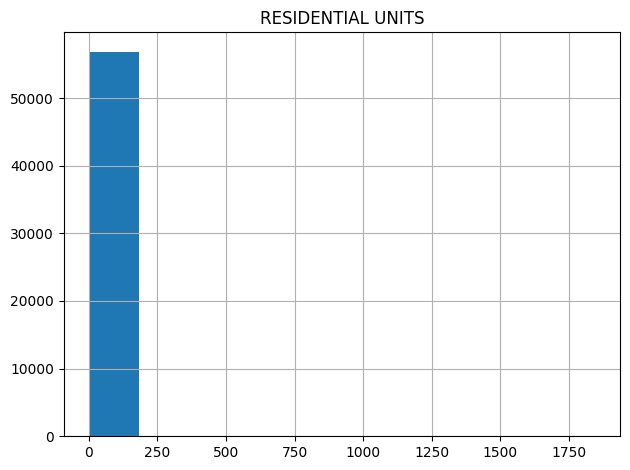

COMMERCIAL UNITS


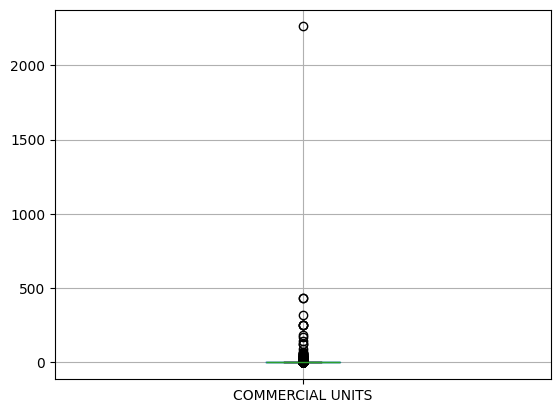

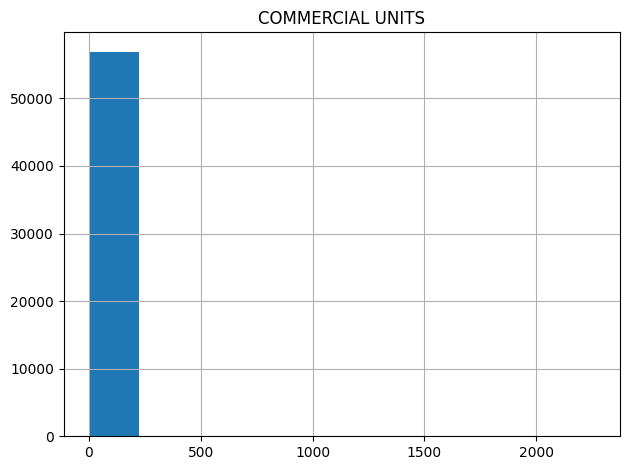

TOTAL UNITS


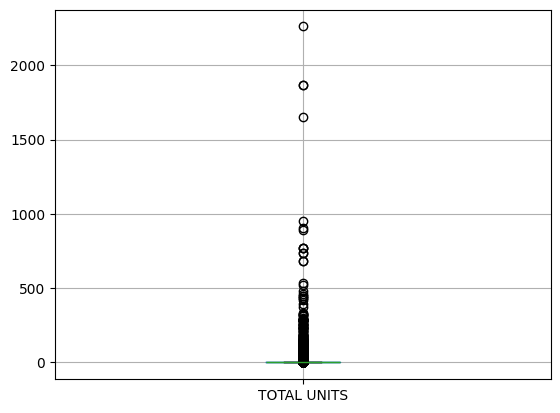

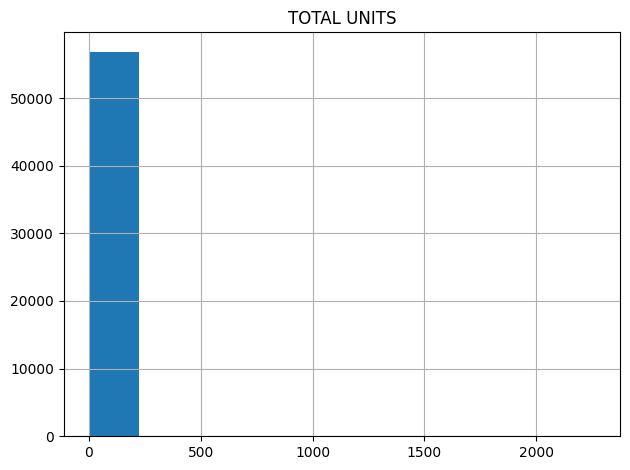

LAND SQUARE FEET


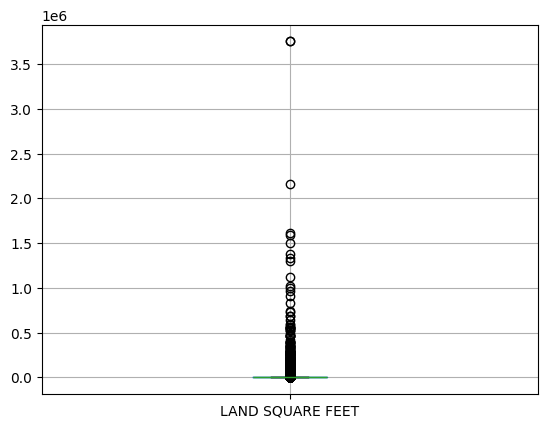

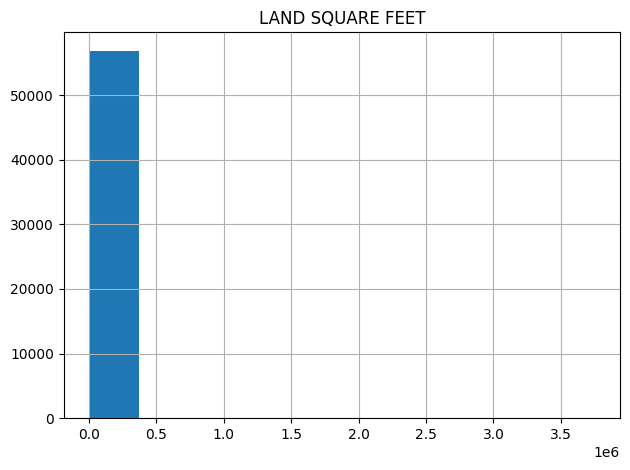

GROSS SQUARE FEET


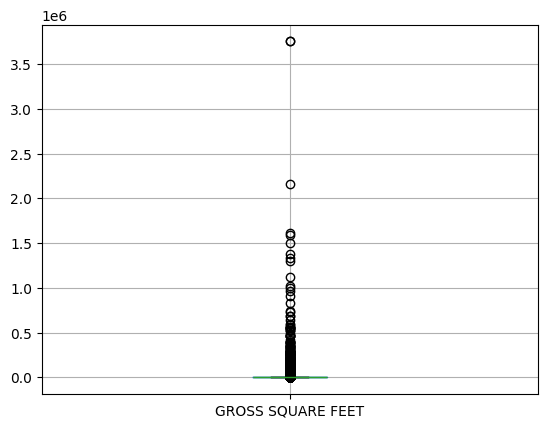

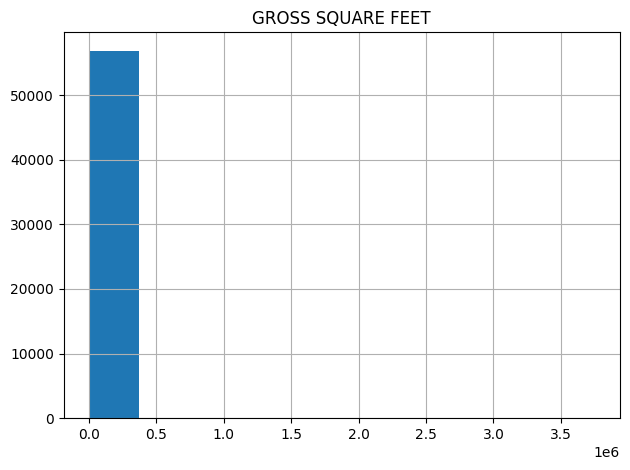

YEAR BUILT


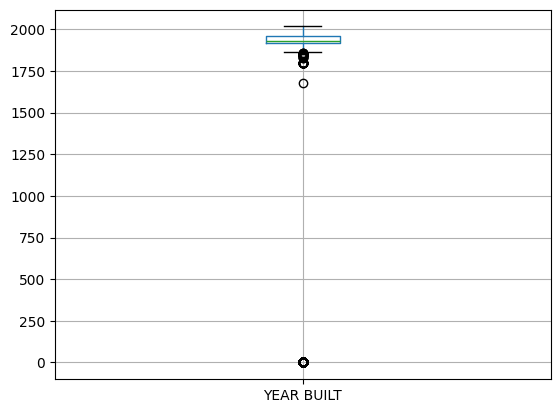

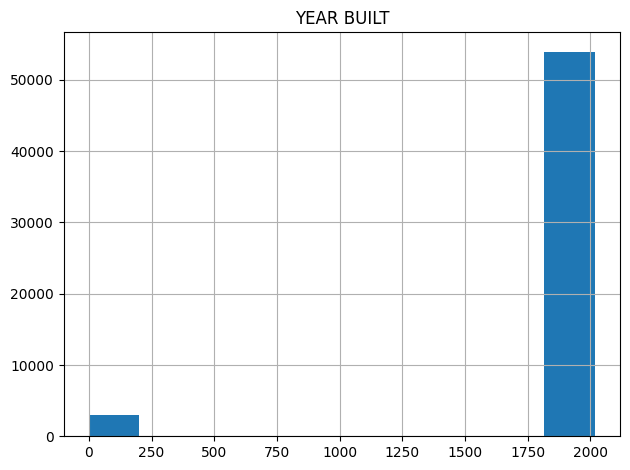

SALE PRICE


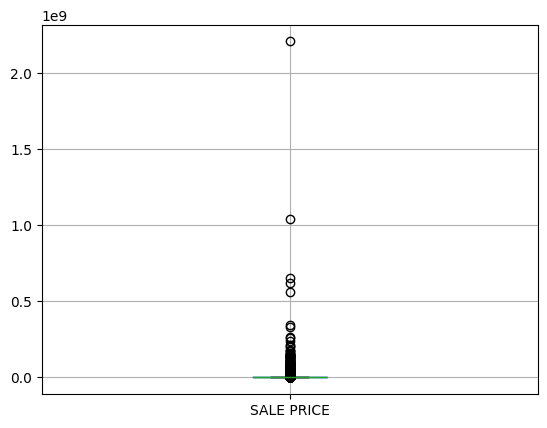

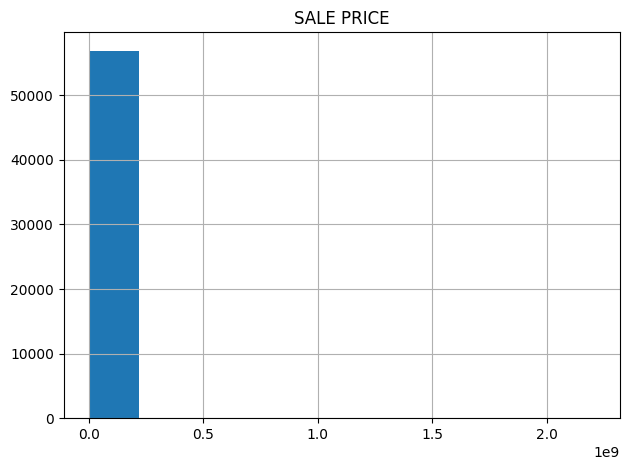

In [20]:
# Lets plot two interesting charts for any numeric column
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    sales_df.boxplot(column=[col])
    sales_df.hist(column=[col])

    plt.tight_layout()
    plt.show()

RESIDENTIAL UNITS


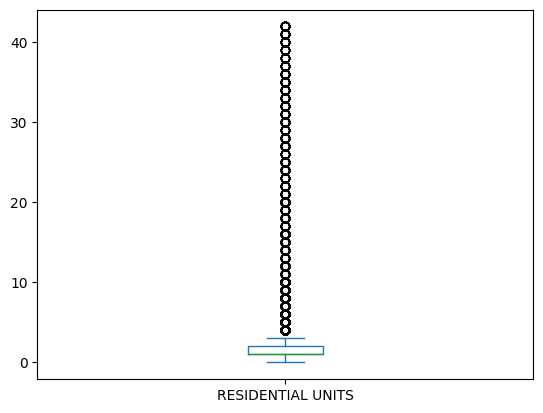

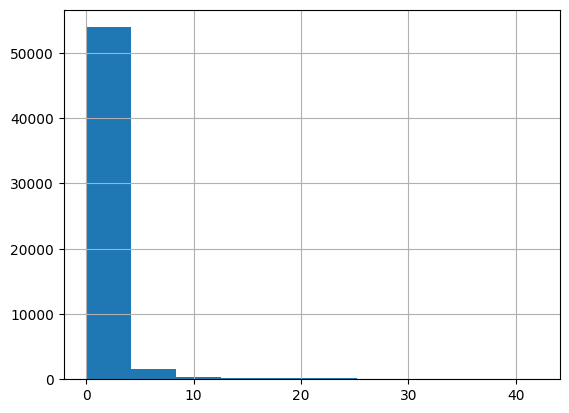

COMMERCIAL UNITS


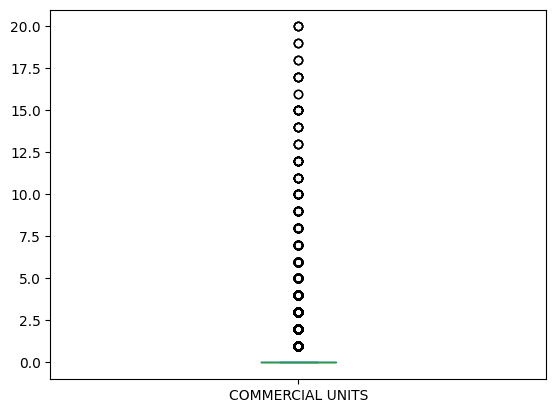

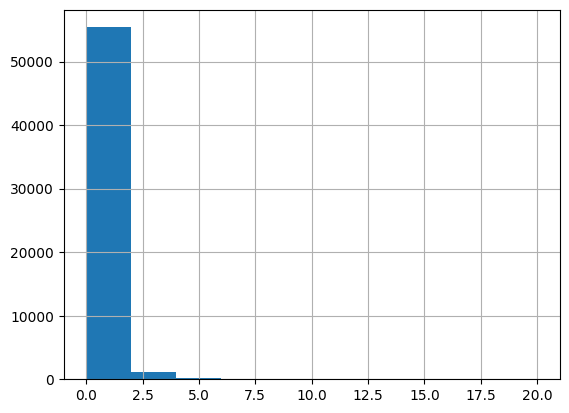

TOTAL UNITS


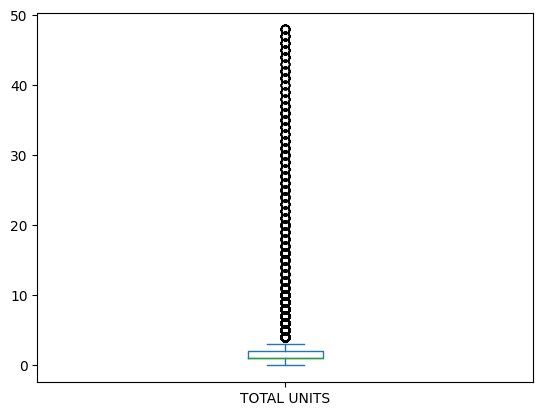

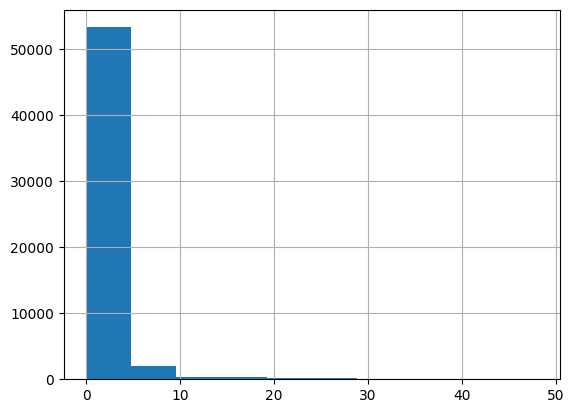

LAND SQUARE FEET


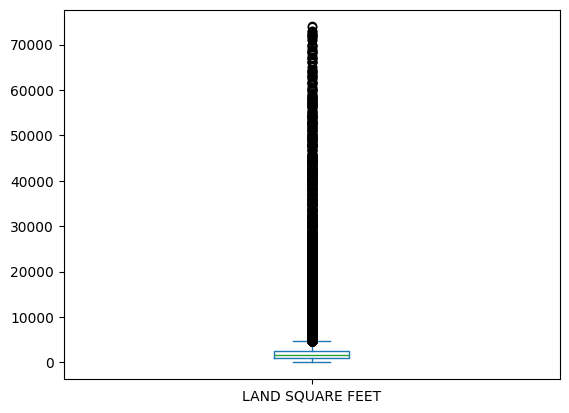

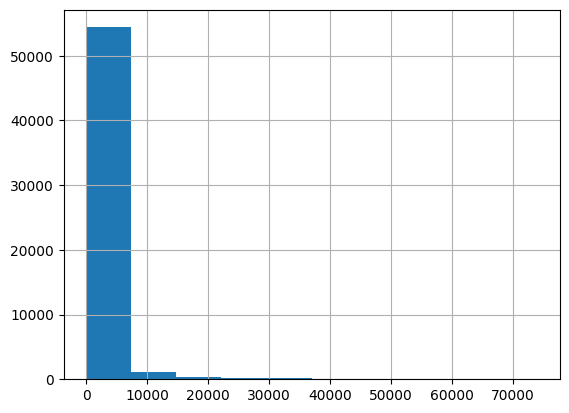

GROSS SQUARE FEET


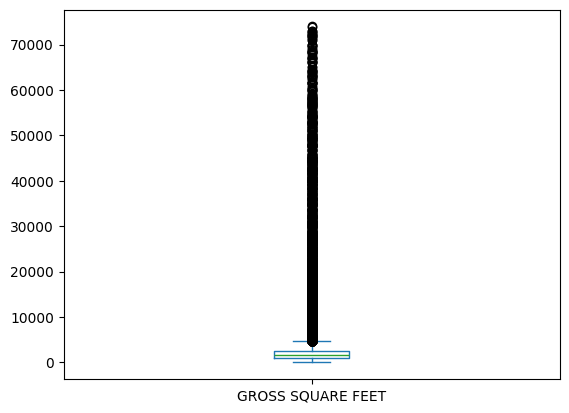

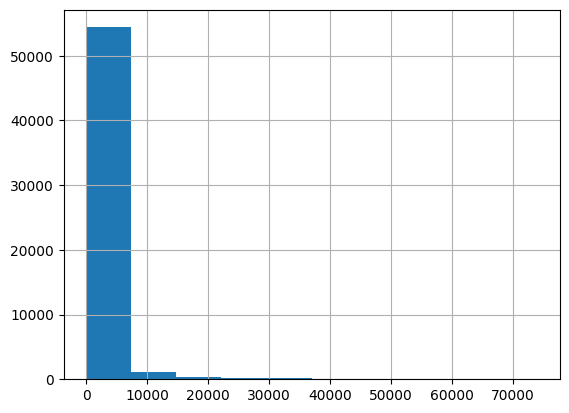

YEAR BUILT


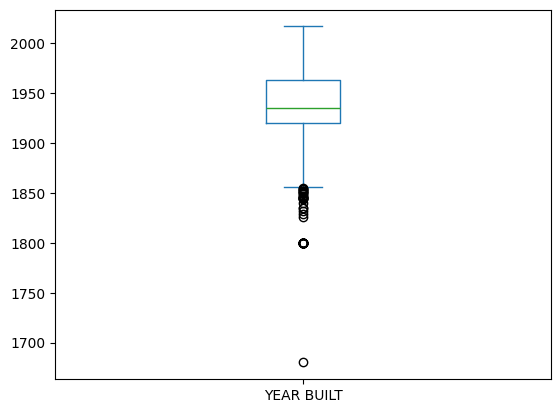

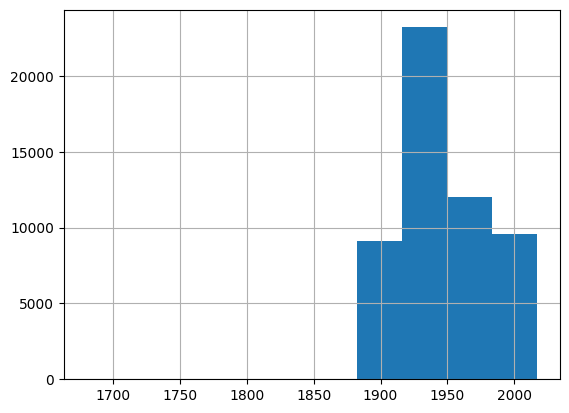

SALE PRICE


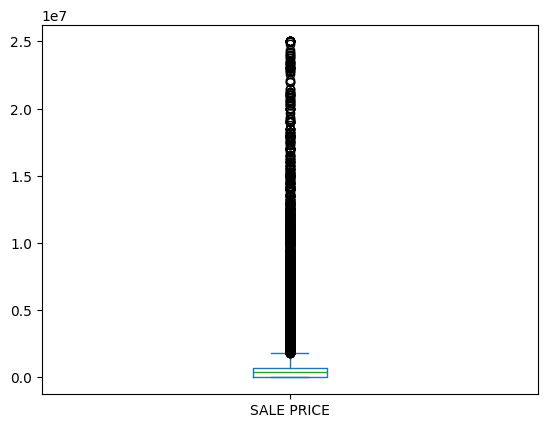

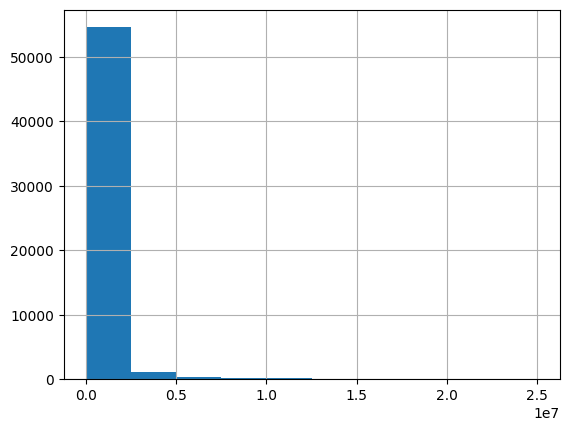

In [21]:
from scipy import stats
import numpy as np

# Lets plot two interesting charts:
for col, dtype in zip(sales_df.columns, sales_df.dtypes):
    if dtype not in ['float', 'int', 'float64', 'int64']: continue

    print(col)
    
    # Quick and dirty outlier filtering, anything over 2 std deviations from the mean 
    # filtered out. 
    filtered_col = sales_df[col][np.abs(stats.zscore(sales_df[col])) < 2]
    
    filtered_col.plot.box()
    plt.show()
    
    filtered_col.hist(bins=10)
    plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Note that we are NOT going to scale "sale price" because
# ultimately that will be our target value. WE still need the
# label to be in the format we wish to predict. 
cols_to_scale = [
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT'
]

scaled_cols = scaler.fit_transform(sales_df[cols_to_scale])

# Wow, was it really that easy? (no)
scaled_cols

array([[2.71149675e-03, 0.00000000e+00, 2.21141088e-03, 1.71707463e-03,
        1.71707463e-03, 9.41993059e-01],
       [1.51843818e-02, 1.32684653e-03, 1.37107475e-02, 4.98324919e-03,
        4.98324919e-03, 9.41993059e-01],
       [8.67678959e-03, 4.42282176e-04, 7.51879699e-03, 2.08048654e-03,
        2.08048654e-03, 9.41993059e-01],
       ...,
       [1.08459870e-03, 0.00000000e+00, 8.84564352e-04, 3.98873236e-04,
        3.98873236e-04, 9.54387705e-01],
       [0.00000000e+00, 3.09597523e-03, 3.09597523e-03, 1.70952910e-02,
        1.70952910e-02, 9.92067427e-01],
       [0.00000000e+00, 4.42282176e-04, 4.42282176e-04, 6.39903588e-04,
        6.39903588e-04, 9.94546356e-01]])

In [23]:
# So, we just got back an NDArray, and we need to put these
# columns back into a dataframe.
scaled_df = sales_df.copy(deep=True)

for i, col  in enumerate(cols_to_scale):
    scaled_df[col] = scaled_cols[:, i]

scaled_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,0.002711,0.000000,0.002211,0.001717,0.001717,0.941993,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,0.015184,0.001327,0.013711,0.004983,0.004983,0.941993,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,0.008677,0.000442,0.007519,0.002080,0.002080,0.941993,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,0.005423,0.000000,0.004423,0.001811,0.001811,0.948438,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,0.003254,0.000000,0.002654,0.001230,0.001230,0.941993,2,C2,8000000.0


In [24]:
scaled_df.describe()


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,56936.000000,56936.000000,56936.000000,56936.000000,56936.000000,56936.000000,5.693600e+04
mean,0.001504,0.000120,0.001353,0.001079,0.001079,0.914969,9.792441e+05
std,0.010864,0.004563,0.010028,0.009341,0.009341,0.213198,1.234621e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000542,0.000000,0.000442,0.000279,0.000279,0.951909,0.000000e+00
50%,0.000542,0.000000,0.000442,0.000448,0.000448,0.957362,3.878605e+05
75%,0.001085,0.000000,0.000885,0.000683,0.000683,0.971740,7.494002e+05
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.210000e+09


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Note that we are NOT going to scale "sale price" because
# ultimately that will be our target value. WE still need the
# label to be in the format we wish to predict. 
cols_to_scale = [
    'RESIDENTIAL UNITS',
    'COMMERCIAL UNITS',
    'TOTAL UNITS',
    'LAND SQUARE FEET',
    'GROSS SQUARE FEET',
    'YEAR BUILT'
]

scaled_cols = scaler.fit_transform(sales_df[cols_to_scale])

# So, we just got back an NDArray, and we need to put these
# columns back into a dataframe.
scaled_df = sales_df.copy(deep=True)

for i, col  in enumerate(cols_to_scale):
    scaled_df[col] = scaled_cols[:, i]

scaled_df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,,C2,10009,0.111179,-0.026196,0.085610,0.068346,0.068346,0.126758,2,C2,6625000.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,1.259231,0.264563,1.232298,0.418024,0.418024,0.126758,2,C7,0.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,,C7,10009,0.660247,0.070724,0.614851,0.107253,0.107253,0.126758,2,C7,0.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,,C4,10009,0.360755,-0.026196,0.306127,0.078451,0.078451,0.156990,2,C4,3936272.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,,C2,10009,0.161094,-0.026196,0.129714,0.016251,0.016251,0.126758,2,C2,8000000.0


In [26]:
# Even though we labeled some columns as "category" we still need to one-hot 
# encode them. Pandas makes this super easy too:
scaled_dummy_df = pd.get_dummies(scaled_df)
scaled_dummy_df.head(1)

# Note that this takes awhile, it's procecssing a lot of data. 
# Note also that pandas automatically looks for columns with
# a categorical type, so being explicit above was important 
# to making this part easy.

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_1,BOROUGH_2,BOROUGH_3,...,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z9
0,0.111179,-0.026196,0.08561,0.068346,0.068346,0.126758,6625000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# Holy crap, 12,413 columns!

# Note that all our numeric columns are between 0 and 1, except SALE PRICE
# All that's left to do here is to separate the labels from the features.

x_train = scaled_dummy_df.drop(columns=['SALE PRICE'])
y_train = scaled_dummy_df['SALE PRICE']

x_train.head(1)


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BOROUGH_1,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W6,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z9
0,0.111179,-0.026196,0.08561,0.068346,0.068346,0.126758,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
y_train.head(1)


0    6625000.0
Name: SALE PRICE, dtype: float64

In [29]:
# Sweet, lets make a simple neural net with keras to make sure we can run the data
# through it. We don't expect great predictions out of this simple model we just
# want to be sure that we can :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Sigmoid and other functions that squash the output might not be
# very appropriate for this task, because our target values are 
# quite large!
model.add(Dense(units=32, activation='relu', input_shape=(len(x_train.columns),)))

# For regression it's common to use a linear activation function
# since our output could be anything. In our case, it would never
# make sense to guess less than 0, so I'm using relu
model.add(Dense(units=1, activation='relu'))

# This function provides useful text data for our network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                397024    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 397057 (1.51 MB)
Trainable params: 397057 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# MSE is pretty common for regression tasks
model.compile(optimizer="adam", loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).